In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
#import the dataset
df = pd.read_csv('C:/Users/nyaga/Desktop/project model/training_data.csv')

In [3]:
df.head(10)

,COUNTY,SUBCOUNTY,Area Ha LR 2018,Quantity Ton LR 2018,Temperature,Humidity,precipitation
0,BARINGO,Baringo central,"8,100","10,200",16.983562,71.051507,4.312055
1,BARINGO,Baringo North,"4,700","5,660",16.983562,71.051507,4.312055
2,BARINGO,Baringo South,"6,080","11,932",16.983562,71.051507,4.312055
3,BARINGO,East Pokot,"1,450","1,747",16.983562,71.051507,4.312055
4,BARINGO,Mogotio,"5,034","5,075",16.983562,71.051507,4.312055
5,BARINGO,Eldama Ravine,"12,248","23,780",16.983562,71.051507,4.312055
6,BOMET,Bomet Central,"4,350","7,623",17.473699,75.482740,2.926301
7,BOMET,Bomet East,"3,600","7,070",17.473699,75.482740,2.926301
8,BOMET,Chepalangu,"6,540","7,358",17.473699,75.482740,2.926301
9,BOMET,Konoin,"1,950","3,861",17.473699,75.482740,2.926301


In [4]:
df.isnull().sum()

COUNTY                  0
SUBCOUNTY               0
Area Ha LR 2018         0
Quantity Ton LR 2018    0
Temperature             0
Humidity                0
precipitation           0
dtype: int64

In [5]:
# Convert the 'total_yield_in_the_area_farmed' and 'area_farmed_in_ha' columns to float
df['Quantity Ton LR 2018'] = df['Quantity Ton LR 2018'].str.replace(',', '').astype(float)
df['Area Ha LR 2018'] = df['Area Ha LR 2018'].str.replace(',', '').astype(float)

# Add a new column 'yield_per_ha' by dividing the fourth column by the third column
df['yield_per_ha'] = df['Quantity Ton LR 2018'] / df['Area Ha LR 2018']

# Display the updated DataFrame with the new column
df.head()

,COUNTY,SUBCOUNTY,Area Ha LR 2018,Quantity Ton LR 2018,Temperature,Humidity,precipitation,yield_per_ha
0,BARINGO,Baringo central,8100.0,10200.0,16.983562,71.051507,4.312055,1.259259
1,BARINGO,Baringo North,4700.0,5660.0,16.983562,71.051507,4.312055,1.204255
2,BARINGO,Baringo South,6080.0,11932.0,16.983562,71.051507,4.312055,1.962500
3,BARINGO,East Pokot,1450.0,1747.0,16.983562,71.051507,4.312055,1.204828
4,BARINGO,Mogotio,5034.0,5075.0,16.983562,71.051507,4.312055,1.008145


In [6]:
df.describe()

,Area Ha LR 2018,Quantity Ton LR 2018,Temperature,Humidity,precipitation,yield_per_ha
count,291.000000,291.000000,291.000000,291.000000,291.000000,284.000000
mean,5182.876289,11936.821306,21.363852,70.912413,3.104132,1.775218
std,5396.422102,20823.003264,3.544018,6.324373,1.800477,1.062864
min,0.000000,0.000000,16.435890,48.424384,0.057474,0.000000
25%,1415.000000,1411.000000,18.374247,70.381096,1.409315,1.006108
50%,3600.000000,5040.000000,20.386849,71.222192,3.512603,1.599290
75%,7490.000000,12285.000000,23.068219,73.129589,4.349863,2.249895
max,31120.000000,160600.000000,28.507671,81.285753,6.492055,6.017050


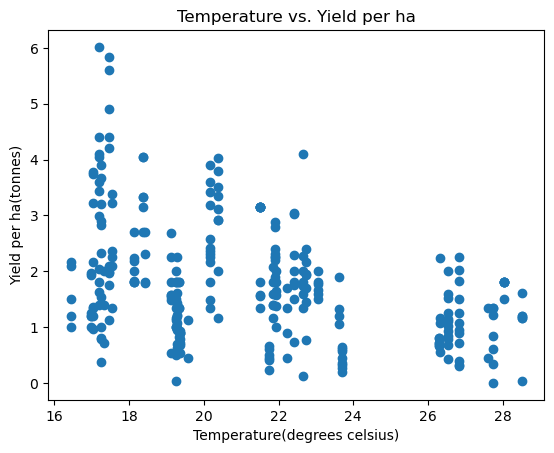

In [7]:
# Scatter plot of temperature vs. yield_per_ha
plt.scatter(df['Temperature'], df['yield_per_ha'])
plt.xlabel('Temperature(degrees celsius)')
plt.ylabel('Yield per ha(tonnes)')
plt.title('Temperature vs. Yield per ha')
plt.show()

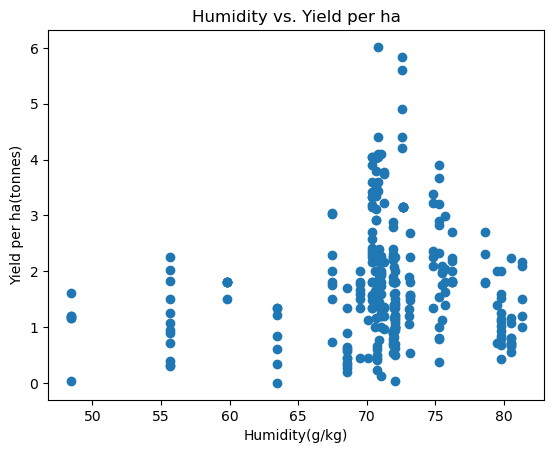

In [8]:
# Scatter plot of humidity vs. yield_per_ha
plt.scatter(df['Humidity'], df['yield_per_ha'])
plt.xlabel('Humidity(g/kg)')
plt.ylabel('Yield per ha(tonnes)')
plt.title('Humidity vs. Yield per ha')
plt.show()

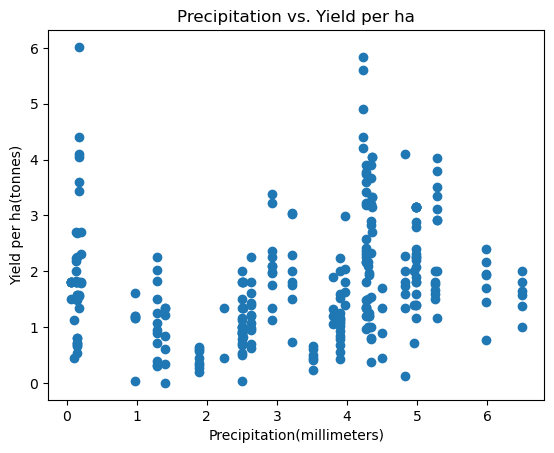

In [9]:
# Scatter plot of precipitation vs. yield_per_ha
plt.scatter(df['precipitation'], df['yield_per_ha'])
plt.xlabel('Precipitation(millimeters)')
plt.ylabel('Yield per ha(tonnes)')
plt.title('Precipitation vs. Yield per ha')
plt.show()

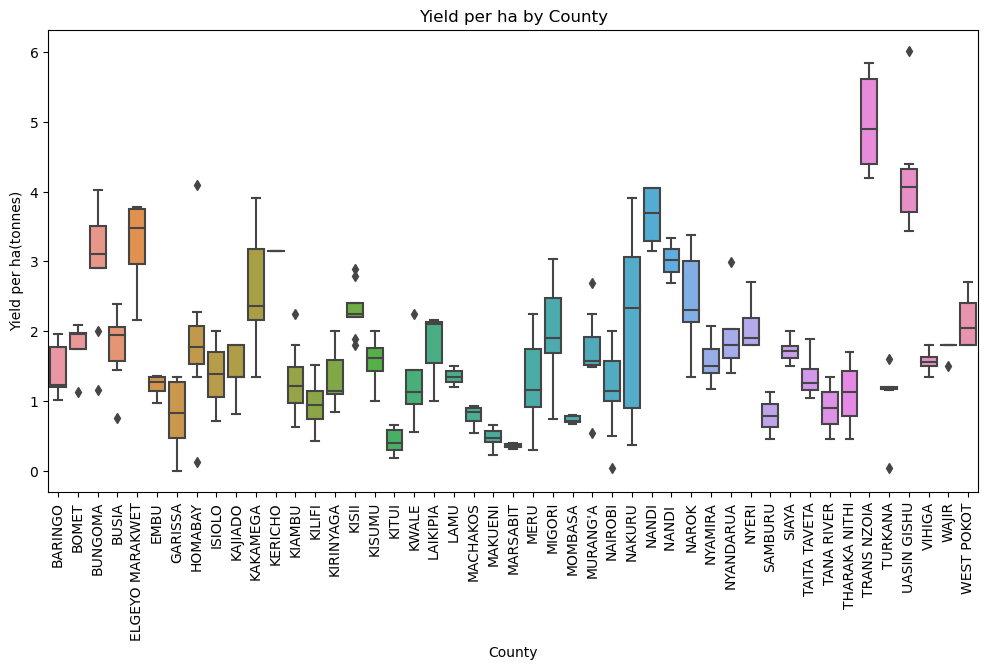

In [10]:
import seaborn as sns

# Box plot of yield_per_ha by county
plt.figure(figsize=(12, 6))
sns.boxplot(x='COUNTY', y='yield_per_ha', data=df)
plt.xticks(rotation=90)
plt.xlabel('County')
plt.ylabel('Yield per ha(tonnes)')
plt.title('Yield per ha by County')
plt.show()

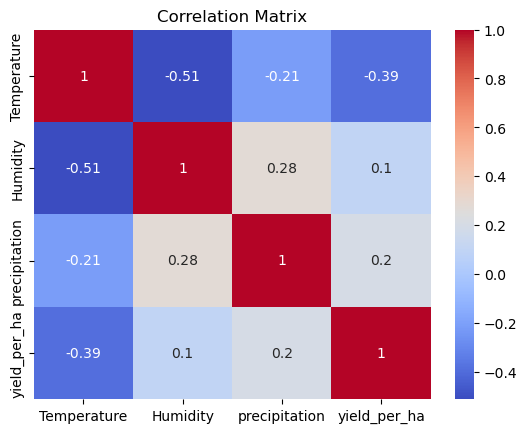

In [11]:
correlation_matrix = df[['Temperature', 'Humidity', 'precipitation', 'yield_per_ha']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
#df=df.drop('Area Ha LR 2018', axis=1)
df=df.drop('Quantity Ton LR 2018', axis=1)
df.head()

,COUNTY,SUBCOUNTY,Area Ha LR 2018,Temperature,Humidity,precipitation,yield_per_ha
0,BARINGO,Baringo central,8100.0,16.983562,71.051507,4.312055,1.259259
1,BARINGO,Baringo North,4700.0,16.983562,71.051507,4.312055,1.204255
2,BARINGO,Baringo South,6080.0,16.983562,71.051507,4.312055,1.962500
3,BARINGO,East Pokot,1450.0,16.983562,71.051507,4.312055,1.204828
4,BARINGO,Mogotio,5034.0,16.983562,71.051507,4.312055,1.008145


In [13]:
counties_and_subcounties=pd.read_csv('C:/Users/nyaga/Desktop/project model/training_data.csv')

In [14]:
all_county_names = counties_and_subcounties['COUNTY'].unique()
all_subcounty_names = counties_and_subcounties['SUBCOUNTY'].unique()

In [15]:
print(all_county_names)

['BARINGO' 'BOMET' 'BUNGOMA' 'BUSIA' 'ELGEYO MARAKWET' 'EMBU' 'GARISSA'
 'HOMABAY' 'ISIOLO' 'KAJIADO' 'KAKAMEGA' 'KERICHO' 'KIAMBU' 'KILIFI'
 'KIRINYAGA' 'KISII' 'KISUMU' 'KITUI' 'KWALE' 'LAIKIPIA' 'LAMU' 'MACHAKOS'
 'MAKUENI' 'MARSABIT' 'MERU' 'MIGORI' 'MOMBASA' "MURANG'A" 'NAIROBI'
 'NAKURU' 'NANDI' 'NANDI ' 'NAROK' 'NYAMIRA' 'NYANDARUA' 'NYERI' 'SAMBURU'
 'SIAYA' 'TAITA TAVETA' 'TANA RIVER' 'THARAKA NITHI' 'TRANS NZOIA'
 'TURKANA' 'UASIN GISHU' 'VIHIGA' 'WAJIR' 'WEST POKOT']


In [16]:
print(all_subcounty_names)

['Baringo central' 'Baringo North' 'Baringo South' 'East Pokot' 'Mogotio'
 'Eldama Ravine' 'Bomet Central' 'Bomet East' 'Chepalangu' 'Konoin'
 'Sotik' 'Bumula' 'Kabuchai' 'Kanduyi' 'Kimilili' 'Mt.Elgon' 'Sirisia'
 'Tongaren' 'Webuye East' 'Webuye West' 'Samia' 'Bunyala' 'Butula'
 'Matayos' 'Teso south' 'Nambale' 'Teso North' 'Keiyo North' 'Keiyo South'
 'Marakwet East' 'Marakwet West ' 'Manyatta' 'Mbeere North' 'Mbeere South'
 'Runyenjes' 'Garissa' 'Fafi' 'Balambala' 'Dadaab' 'Lagdera' 'Ijara'
 'Hulugho' 'Suba' 'Kabondo' 'karachuonyo' 'Kasipul' 'Ndhiwa' 'Rangwe'
 'Mbita' 'Homa Bay Town' 'Merti' 'Isiolo' 'Garba Tulla' 'Kajiado Central'
 'Kajiado East' 'Kajiado North' 'Kajiado South' 'Kajiado West' 'Khwisero'
 'Likuyani' 'Butere' 'Lugari' 'Malava' 'MATETE' 'Mumias east'
 'Mumias west' 'SHINYALU' 'Lurambi' 'Navakholo' 'IKOLOMANI' 'Matungu'
 'Ainamoi' 'Belgut' 'Bureti' 'Kipkelion East' 'Kipkelion West'
 'Soin-Sigowet' 'Kabete' 'Thika' 'Kiambu' 'Gatundu South' 'Kikuyu' 'Juja'
 'Limuru' 'Lar

In [17]:
# Example: One-hot encoding for 'county' and 'subcounty'
df = pd.get_dummies(df, columns=['COUNTY', 'SUBCOUNTY'],)

In [18]:
df.head()

,Area Ha LR 2018,Temperature,Humidity,precipitation,yield_per_ha,COUNTY_BARINGO,COUNTY_BOMET,COUNTY_BUNGOMA,COUNTY_BUSIA,COUNTY_ELGEYO MARAKWET,...,SUBCOUNTY_WEST POKOT,SUBCOUNTY_WESTLANDS,SUBCOUNTY_Wajir East,SUBCOUNTY_Wajir South,SUBCOUNTY_Wajir West,SUBCOUNTY_Webuye East,SUBCOUNTY_Webuye West,SUBCOUNTY_YATTA,SUBCOUNTY_karachuonyo,SUBCOUNTY_wajir North
0,8100.0,16.983562,71.051507,4.312055,1.259259,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4700.0,16.983562,71.051507,4.312055,1.204255,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,6080.0,16.983562,71.051507,4.312055,1.962500,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1450.0,16.983562,71.051507,4.312055,1.204828,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5034.0,16.983562,71.051507,4.312055,1.008145,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
column_order = df.columns.drop('yield_per_ha')

In [20]:
print(column_order)

Index(['Area Ha LR 2018', 'Temperature', 'Humidity', 'precipitation',
       'COUNTY_BARINGO', 'COUNTY_BOMET', 'COUNTY_BUNGOMA', 'COUNTY_BUSIA',
       'COUNTY_ELGEYO MARAKWET', 'COUNTY_EMBU',
       ...
       'SUBCOUNTY_WEST POKOT', 'SUBCOUNTY_WESTLANDS', 'SUBCOUNTY_Wajir East',
       'SUBCOUNTY_Wajir South', 'SUBCOUNTY_Wajir West',
       'SUBCOUNTY_Webuye East', 'SUBCOUNTY_Webuye West', 'SUBCOUNTY_YATTA',
       'SUBCOUNTY_karachuonyo', 'SUBCOUNTY_wajir North'],
      dtype='object', length=341)


In [21]:
mean_yield = df['yield_per_ha'].mean()
df['yield_per_ha'].fillna(mean_yield, inplace=True)

In [22]:
X = df.drop('yield_per_ha', axis=1)  # Assuming 'maize_yield' is the target variable
y = df['yield_per_ha']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [23]:
print("Missing values in y:", y.isna().sum())

Missing values in y: 0


In [24]:
#Using feature importance from a trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [25]:
y_pred = rf.predict(X_test)

In [26]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

Mean Absolute Error (MAE): 0.47


In [27]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

Mean Squared Error (MSE): 0.37


In [28]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Root Mean Squared Error (RMSE): 0.61


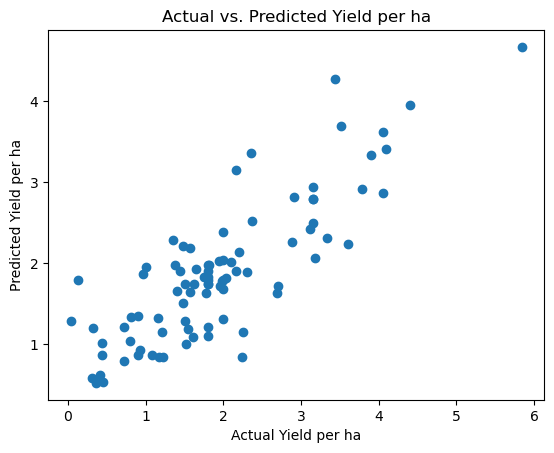

In [29]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Yield per ha')
plt.ylabel('Predicted Yield per ha')
plt.title('Actual vs. Predicted Yield per ha')
plt.show()

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [None, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [32]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=1)

In [33]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 300, 400]},
             scoring='neg_mean_squared_error', verbose=1)

In [34]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [35]:
y_pred_best = best_model.predict(X_test)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))

In [36]:
print(rmse_best)

0.6098282818155154


In [37]:
import pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)



In [81]:
# Example input data for prediction
input_data = pd.DataFrame({
    'COUNTY':['BARINGO'],
    'SUBCOUNTY':['Eldama Ravine'],
    'Area Ha LR 2018':[200],
    'Temperature': [2],
    'Humidity': [65.0],
    'precipitation': [60.0],
     # One-hot encoded subcounty variable
    # Include all relevant features
})
# Remove the available 'county' and 'subcounty' names from the respective arrays
if 'COUNTY' in input_data:
    available_county_name = input_data['COUNTY'].iloc[0]
    all_county_names = all_county_names[all_county_names != available_county_name]

if 'SUBCOUNTY' in input_data:
    available_subcounty_name = input_data['SUBCOUNTY'].iloc[0]
    all_subcounty_names = all_subcounty_names[all_subcounty_names != available_subcounty_name]
    
    
county = pd.DataFrame({'COUNTY_' + available_county_name: [1]}, index=input_data.index)
subcounty = pd.DataFrame({'SUBCOUNTY_' + available_subcounty_name: [1]}, index=input_data.index)
# Create DataFrames for missing columns
missing_county_columns = pd.DataFrame(0, columns=['COUNTY_' + county_name for county_name in all_county_names], index=input_data.index)
missing_subcounty_columns = pd.DataFrame(0, columns=['SUBCOUNTY_' + subcounty_name for subcounty_name in all_subcounty_names], index=input_data.index)

# Concatenate the missing columns with the original DataFrame
input_data = pd.concat([input_data,county, subcounty, missing_county_columns, missing_subcounty_columns], axis=1)

# Now, the input_data DataFrame includes missing columns for both 'county' and 'subcounty' after removing available names
input_data.drop(columns=['COUNTY', 'SUBCOUNTY'], inplace=True)

# Reorder the columns in the input data to match the training data
input_data = input_data[column_order]



In [82]:
print(county)
print(subcounty)

   COUNTY_BARINGO
0               1
   SUBCOUNTY_Eldama Ravine
0                        1


In [83]:
predicted_yield_per_ha = best_model.predict(input_data)

In [84]:
print(predicted_yield_per_ha)

[1.5118669]
